<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Controle de Versão III
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Sistema de branchs;</li>
  <li>Trabalhando com branchs;</li>
  <li>Mover código entre branchs.</li>
</ol>

---

# **Exercícios**

## 1\. Setup

Para realizar os exercicios vamos configurar o `git` e trazer o projeto do GitHub para a a máquina virtual do Google Colab (ou na sua máquina local, as instruções são as mesmas). Para tanto, replique as atividades expostas na aula 1 deste módulo.

### **1.1. Autenticação**

Nesta etapa, vamos configura o `git` com suas credenciais.

In [ ]:
import os

username = "<seu-usuario-git>" # insira o seu nome de usuário do git
os.environ["GITHUB_USER"] = username

!git config --global user.name "${GITHUB_USER}"

In [ ]:
import os
from getpass import getpass

usermail = getpass()
os.environ["GITHUB_MAIL"] = usermail

!git config --global user.email "${GITHUB_MAIL}"

··········


In [ ]:
import os
from getpass import getpass

usertoken = getpass()
os.environ["GITHUB_TOKEN"] = usertoken

··········


### **1.2. Projeto**

Nesta etapa, vamos trazer o projeto do GitHub para máquina local.

In [ ]:
!git clone https://github.com/EDVADMBD/turbo-invention.git # insira o link do seu repositório remoto

Cloning into 'turbo-invention'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 486.64 KiB | 7.49 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd /content/turbo-invention
# insira o nome do seu repositório

/content/turbo-invention


---

## 2\. Preço da gasolina

O código abaixo gera um arquivo com o preço médio de venda da gasolina na cidade de São Paulo nos 10 primeiros dias de Julho de 2021.

> **Nota**: Este arquivo é o mesmo do exercício do módulo anterior.

In [ ]:
%%writefile gasolina.csv
dia,venda
1,5.11
2,4.99
3,5.02
4,5.21
5,5.07
6,5.09
7,5.13
8,5.12
9,4.94
10,5.03

Writing gasolina.csv


### **2.1. Branch**

Crie uma branch chamada `develop` e aponte o context do `git` para a nova branch. Vamos simular uma atualização no exercício do módulo anterior.

In [ ]:
# código de criação da branch develop
%cd /content/turbo-invention
!git branch develope
!git checkout develope
!echo "Esta é uma atualização de exemplo." >> README.md
!git add README.md
!git commit -m "Adicionada uma linha de exemplo ao README.md"





/content/turbo-invention
fatal: A branch named 'develope' already exists.
Already on 'develope'
[develope 317e0d4] Adicionada uma linha de exemplo ao README.md
 1 file changed, 1 insertion(+)


### **2.2. Desenvolvimento**

Gere uma gráfico de linha utilizando os dados do arquivo `gasolina.csv` com o dia no eixo `x`
 e o seu preço no eixo `y` utilizando os pacotes Python de sua preferência, como o Pandas e o Seaborn. Salve o gráfico no arquivo `gasolina.png` e o seu código Python de geração no arquivo `gasolina.py`.

> **Nota**: Este gráfico deve alguns elementos diferente do anterior, como título, legenda, etc.

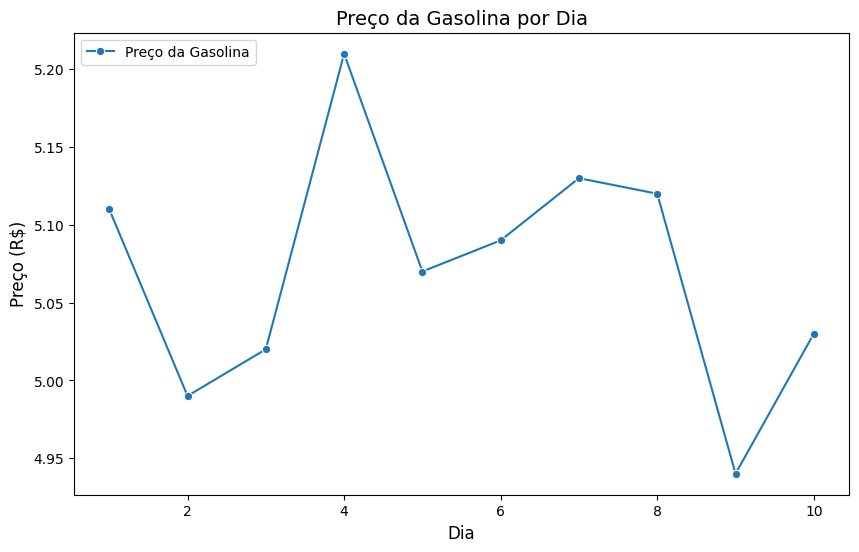

In [ ]:
# código de geração do gráfico
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo CSV
data = pd.read_csv('gasolina.csv')

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='dia', y='venda', marker='o') # Changed 'preco' to 'venda'

# Adicionar título e rótulos
plt.title('Preço da Gasolina por Dia', fontsize=14)
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Preço (R$)', fontsize=12)
plt.legend(['Preço da Gasolina'], loc='upper left')

# Salvar o gráfico
plt.savefig('gasolina.png')

# Mostrar o gráfico
plt.show()


### **2.3. Git**

Utilizando os comandos do `git`, adicione e "commite" os arquivos gerados (base, código Python e gráfico) na branch `develop`.

In [ ]:
# comandos git para adicionar e commitar os arquivos
# Certifique-se de estar na branch develope
!git checkout develope
!git add .



A	base.txt
A	gasolina.csv
A	turbo-invention
A	turbo-invention.git
Already on 'develope'


### **2.4. Github**

Utilizando os comandos do `git`, envie o seu commit para o GitHub.

In [ ]:
# comandos git para enviar o commit para o GitHub

# Navegue até o diretório do repositório
!cd /content/turbo-invention

# Certifique-se de estar na branch develop
!git checkout develope

# Adicione os arquivos ao staging area
!git add /content/turbo-invention/base.txt
!git add /content/turbo-invention/hello.py
!git add /content/turbo-invention/gasolina.png
!git add /content/turbo-invention/gasolina.csv
# Commit com uma mensagem descritiva
!git commit -m "Adiciona arquivos gerados: base, código Python e gráfico"
# Adicione o repositório remoto (caso ainda não tenha feito isso)
!git remote add origin https://github.com/EDVADMBD/turbo-invention
!git push -u  /content/turbo-invention




A	base.txt
A	gasolina.csv
A	turbo-invention
A	turbo-invention.git
Already on 'develope'
[develope cfc161d] Adiciona arquivos gerados: base, código Python e gráfico
 4 files changed, 12 insertions(+)
 create mode 100644 base.txt
 create mode 100644 gasolina.csv
 create mode 160000 turbo-invention
 create mode 100644 turbo-invention.git
error: remote origin already exists.
Branch 'develope' set up to track remote branch 'develope' from '/content/turbo-invention'.
Everything up-to-date


### **2.5. Pull Request e Merge**

No GitHub, crie um *pull request* (PR) para enviar o código da branch de `develop` para a branch `main`. Ainda na plataforma online, confira as atualizações, aprove o PR e realize o *merge*.

In [ ]:
!git checkout -b develope
!git push

fatal: A branch named 'develope' already exists.
Everything up-to-date


---